<a href="https://colab.research.google.com/github/praveenwork/ml/blob/main/Practice/Complex_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-24 19:50:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.208, 172.217.9.208, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  85.5MB/s    in 1.7s    

2021-01-24 19:50:19 (85.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [7]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [10]:
train_horses_dir = os.path.join("/tmp/horse-or-human/horses")
train_humans_dir = os.path.join("/tmp/horse-or-human/humans")

train_horses_names = os.listdir(train_horses_dir)
print(train_horses_names[:10])


train_humans_names = os.listdir(train_humans_dir)
print(train_humans_names[:10])

print('total number of humans:', len(os.listdir(train_horses_dir)))
print('total number of horses:', len(os.listdir(train_humans_dir)))


['horse03-5.png', 'horse09-2.png', 'horse02-2.png', 'horse39-4.png', 'horse45-3.png', 'horse37-4.png', 'horse36-9.png', 'horse27-5.png', 'horse40-3.png', 'horse08-4.png']
['human07-23.png', 'human11-07.png', 'human08-13.png', 'human16-20.png', 'human08-28.png', 'human08-30.png', 'human01-30.png', 'human10-15.png', 'human14-24.png', 'human09-08.png']
total number of humans: 500
total number of horses: 527


8
['/tmp/horse-or-human/horses/horse03-5.png', '/tmp/horse-or-human/horses/horse09-2.png', '/tmp/horse-or-human/horses/horse02-2.png', '/tmp/horse-or-human/horses/horse39-4.png', '/tmp/horse-or-human/horses/horse45-3.png', '/tmp/horse-or-human/horses/horse37-4.png', '/tmp/horse-or-human/horses/horse36-9.png', '/tmp/horse-or-human/horses/horse27-5.png', '/tmp/horse-or-human/humans/human07-23.png', '/tmp/horse-or-human/humans/human11-07.png', '/tmp/horse-or-human/humans/human08-13.png', '/tmp/horse-or-human/humans/human16-20.png', '/tmp/horse-or-human/humans/human08-28.png', '/tmp/horse-or-human/humans/human08-30.png', '/tmp/horse-or-human/humans/human01-30.png', '/tmp/horse-or-human/humans/human10-15.png']


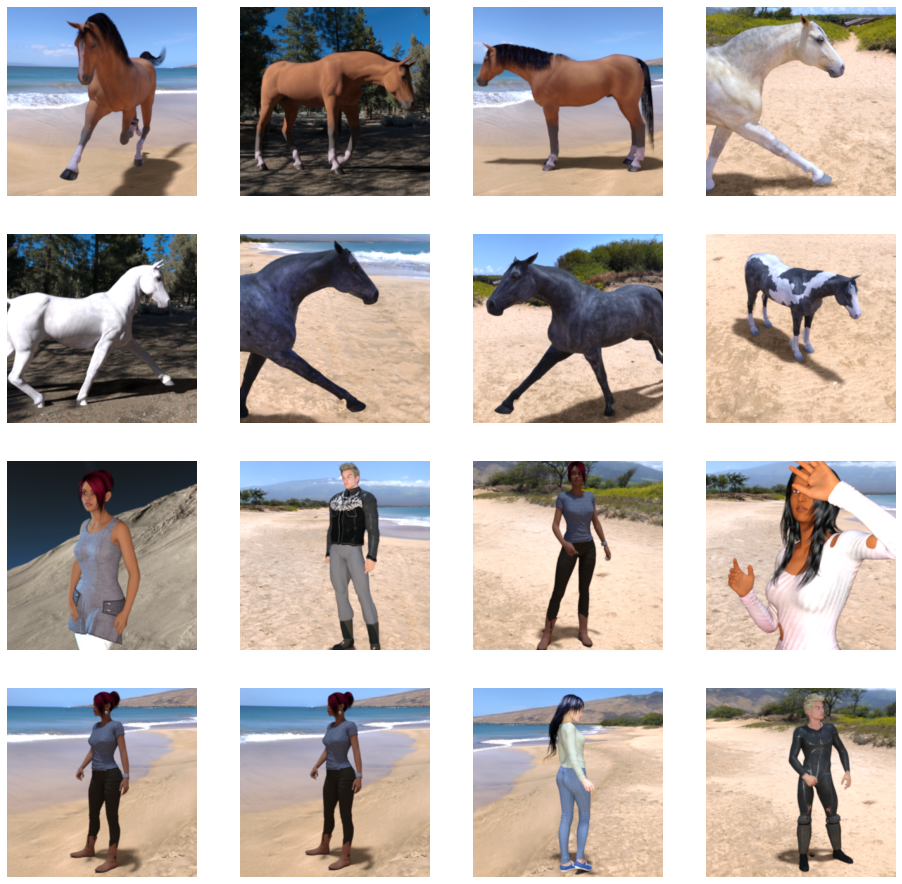

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

#setup matplotlib fig, and size it to fit 4X4 pics

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows *4)

pic_index +=8 
next_horse_pic = [os.path.join(train_horses_dir, fname) 
                    for fname in train_horses_names[pic_index-8: pic_index]]

print(pic_index)
next_human_pics = [os.path.join(train_humans_dir, fname) for fname in train_humans_names[pic_index-8:pic_index]]

print(next_horse_pic+next_human_pics)
for i, img_path in enumerate(next_horse_pic+next_human_pics):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


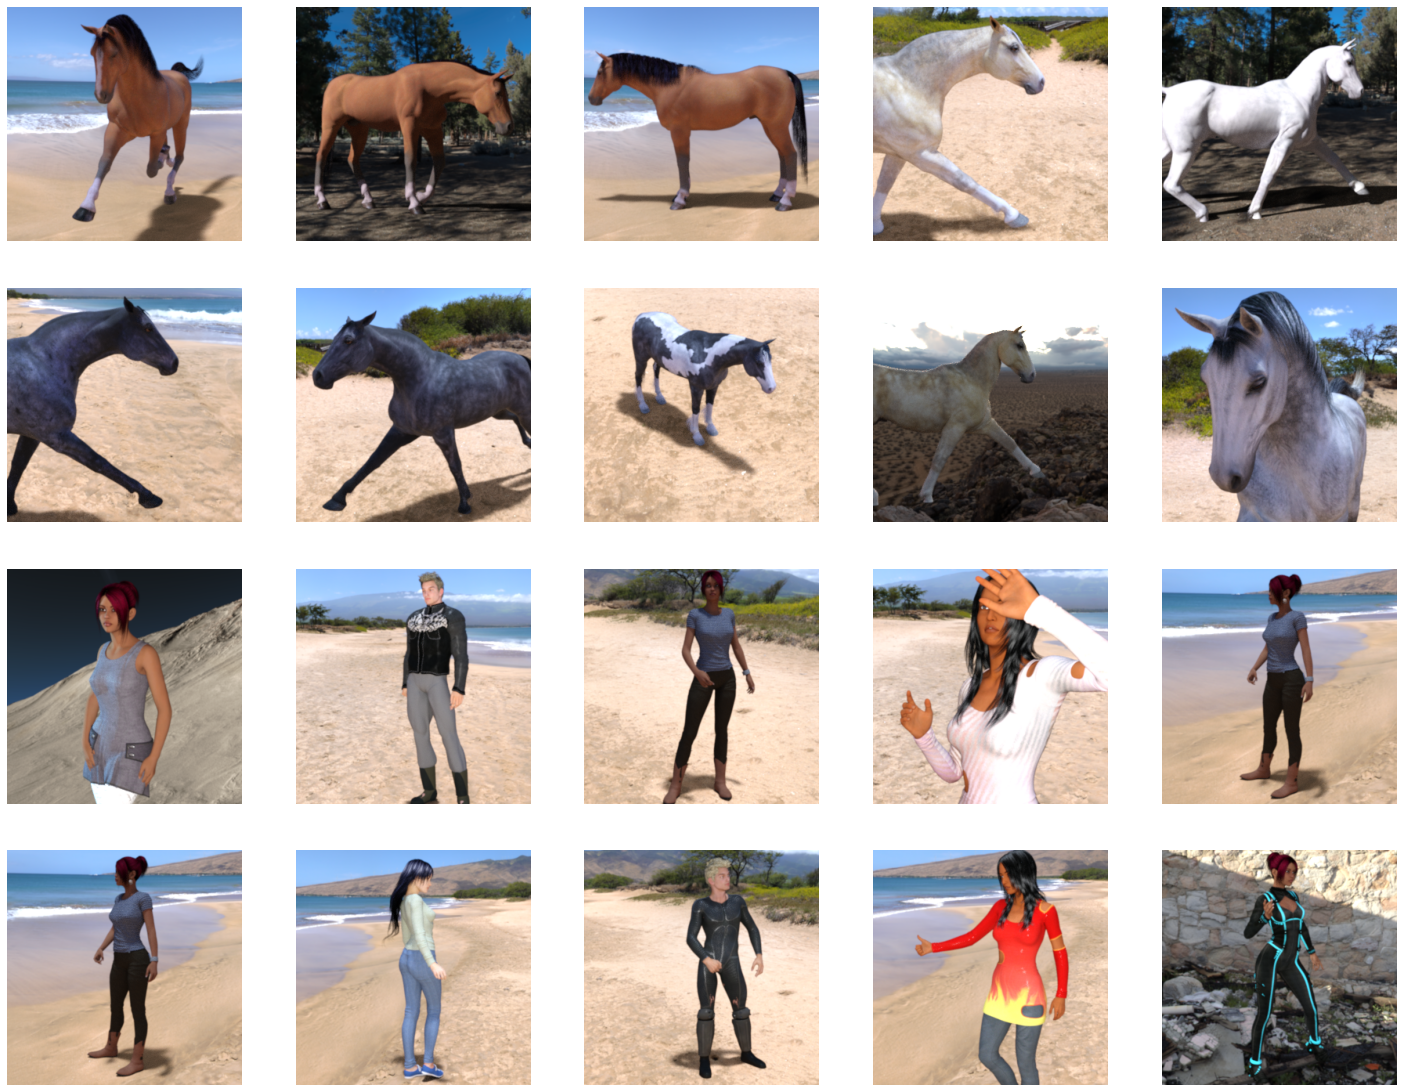

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 5
ncols = 5

pix_index = 0

fig = plt.gcf()
fig.set_size_inches(nrows* 5, ncols*5)


pix_index += 10

nxt_horse_pix = [os.path.join(train_horses_dir, fname) for fname in train_horses_names[pix_index-10: pix_index]]
nxt_human_pix = [os.path.join(train_humans_dir, fname) for fname in train_humans_names[pix_index-10: pix_index]]


for i, imgPath in enumerate(nxt_horse_pix+nxt_human_pix):
  sp = plt.subplot(nrows,nrows, i+1)
  sp.axis('off')
  img = mpimg.imread(imgPath)
  plt.imshow(img)

plt.show()

In [14]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(300,300,3)),
          tf.keras.layers.MaxPool2D(2,2),

          tf.keras.layers.Conv2D(32, (3,3), activation= tf.nn.relu),
          tf.keras.layers.MaxPool2D(2,2),

          tf.keras.layers.Conv2D(64, (3,3),activation = tf.nn.relu),
          tf.keras.layers.MaxPool2D(2,2),

          tf.keras.layers.Conv2D(64, (3,3),activation = tf.nn.relu),
          tf.keras.layers.MaxPool2D(2,2),

          tf.keras.layers.Conv2D(64, (3,3),activation = tf.nn.relu),
          tf.keras.layers.MaxPool2D(2,2),
          
          #Flatten
          tf.keras.layers.Flatten(),
          
          tf.keras.layers.Dense(512, activation= tf.nn.relu),
          tf.keras.layers.Dense(1, activation = tf.nn.sigmoid)



])


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [16]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [81]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#All the images rescale by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

#Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/', #source directory
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)


#Traing

history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose=1
)


Found 1028 images belonging to 2 classes.
Epoch 1/15
8/8 [==============================] - 6s 715ms/step - loss: 0.3748 - accuracy: 0.9300
Epoch 2/15
8/8 [==============================] - 6s 714ms/step - loss: 0.0138 - accuracy: 0.9944
Epoch 3/15
8/8 [==============================] - 6s 702ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 4/15
8/8 [==============================] - 6s 711ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 5/15
8/8 [==============================] - 6s 697ms/step - loss: 7.7166e-04 - accuracy: 1.0000
Epoch 6/15
8/8 [==============================] - 7s 806ms/step - loss: 2.5999e-04 - accuracy: 1.0000
Epoch 7/15
8/8 [==============================] - 6s 826ms/step - loss: 1.7629e-04 - accuracy: 1.0000
Epoch 8/15
8/8 [==============================] - 7s 809ms/step - loss: 9.6413e-05 - accuracy: 1.0000
Epoch 9/15
8/8 [==============================] - 6s 712ms/step - loss: 6.9091e-05 - accuracy: 1.0000
Epoch 10/15
8/8 [==============================] - 6s 70

In [85]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()



Saving 100_5716.JPG to 100_5716.JPG


In [47]:
for fn in uploaded.keys():
  path =  "/content/" + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])

  classes = model.predict(images,batch_size=10)
  print(classes)  
  print(classes[0])

  if classes[0]>0.5:
    print(fn + " is human")
  else:
    print(fn + " is horse")
  

[[0.]]
[0.]
girl-863686_1920.jpg is horse


In [80]:
import os
import shutil

human_file_path = '/content/work-1627703_1920.jpg'
shutil.copy(human_file_path, "/tmp/horse-or-human/humans/")




'/tmp/horse-or-human/humans/work-1627703_1920.jpg'

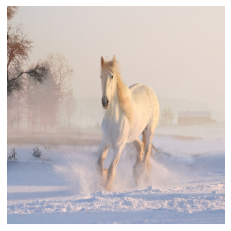

[0.]
wh-3010129_1920.jpg is horse


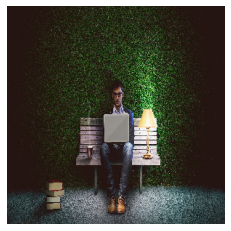

[1.]
work-1627703_1920.jpgis human


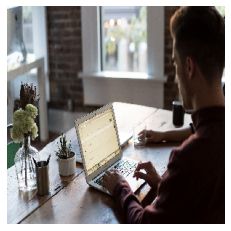

[0.]
office-1081807_1920.jpg is horse


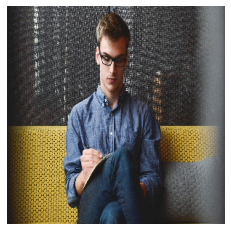

[1.]
entrepreneur-593358_1920.jpgis human


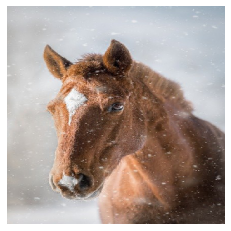

[1.]
horse-4720178_640.jpgis human


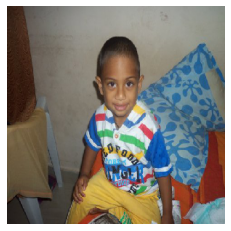

[1.]
100_5716.JPGis human


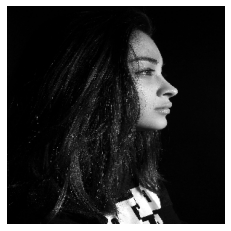

[0.]
portrait-657116_1920 (1).jpg is horse


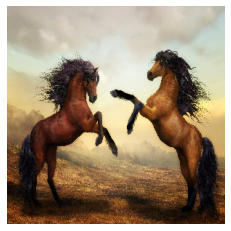

[0.]
horses-2904536_1920.jpg is horse


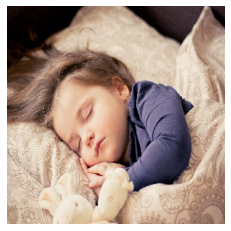

[1.]
baby-1151351_1920.jpgis human


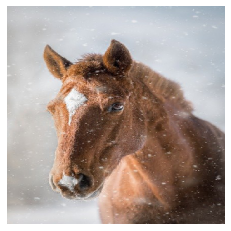

[1.]
horse-4720178_640 (1).jpgis human


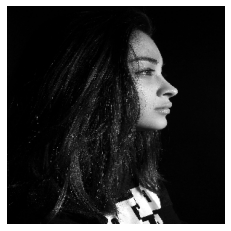

[0.]
portrait-657116_1920.jpg is horse


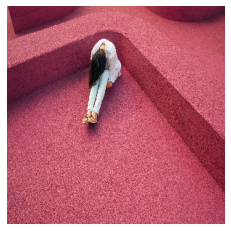

[1.]
girl-863686_1920.jpgis human


In [86]:
import os

path = "/content"
content_files = os.listdir(path)

for items in content_files:
  if os.path.isfile(items):
    img = image.load_img(path+"/"+items, target_size = (300,300))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
   
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
   
    images = np.vstack([x])
    classes = model.predict(images)
    print(classes[0])
    if classes[0]>0.5:
      print(items + "is human")
    else :
      print(items + " is horse")